# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [152]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from scipy import optimize

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject as model
hsm = model.HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

To solve the household model, we start by defining the values given to alpha and sigma. Next we create a loop in a loop that maximize the utility of the choices given to the household, for the values of alpha and sigma. 

In the loop we used the solve_descrete model given from the assignment text, and calculated the different values for HF and HM. 

Finally we plottet HF/HM for the different values of alpha and sigma.

In [159]:
hsm.par.alpha = 0.4

In [160]:
dsol = hsm.solve_discrete()
print(f'LM: {dsol.LM} for alpha and sigma: {hsm.par.alpha, hsm.par.sigma}')
print(f'LF: {dsol.LF} for alpha and sigma: {hsm.par.alpha, hsm.par.sigma}')
print(f'HM: {dsol.HM} for alpha and sigma: {hsm.par.alpha, hsm.par.sigma}')
print(f'HF: {dsol.HF} for alpha and sigma: {hsm.par.alpha, hsm.par.sigma}')

LM: 5.0 for alpha and sigma: (0.4, 1.5)
LF: 4.0 for alpha and sigma: (0.4, 1.5)
HM: 5.0 for alpha and sigma: (0.4, 1.5)
HF: 4.0 for alpha and sigma: (0.4, 1.5)


In [161]:
# Defining values of alpha and sigma
alpha_vec = np.array([0.25, 0.5, 0.75])
sigma_vec = np.array([0.5, 1., 1.5])

Female_Male = []

#Looping over different values of alpha and sigma, and caluclating the ratio of HF and HM
for i in alpha_vec:
    for j in sigma_vec:
        hsm.par.alpha = i
        hsm.par.sigma = j

        Q1sol = hsm.solve_discrete()

        print(f'HF/HM: {Q1sol.HF/Q1sol.HM} for alpha and sigma: {hsm.par.alpha, hsm.par.sigma}')

        Female_Male.append(Q1sol.HF/Q1sol.HM)

Female_Male

HF/HM: 0.6363636363636364 for alpha and sigma: (0.25, 0.5)
HF/HM: 0.4166666666666667 for alpha and sigma: (0.25, 1.0)
HF/HM: 0.3076923076923077 for alpha and sigma: (0.25, 1.5)
HF/HM: 1.1111111111111112 for alpha and sigma: (0.5, 0.5)
HF/HM: 1.25 for alpha and sigma: (0.5, 1.0)
HF/HM: 1.375 for alpha and sigma: (0.5, 1.5)
HF/HM: 2.0 for alpha and sigma: (0.75, 0.5)
HF/HM: 3.75 for alpha and sigma: (0.75, 1.0)
HF/HM: 8.0 for alpha and sigma: (0.75, 1.5)


[0.6363636363636364,
 0.4166666666666667,
 0.3076923076923077,
 1.1111111111111112,
 1.25,
 1.375,
 2.0,
 3.75,
 8.0]

In [176]:
x_values = []

for i in alpha_vec:
    for j in sigma_vec:
        x_values.append('\u03B1=' + str(i)+ ','+ '\u03C3=' + str(j))
    
x_values

['α=0.25,σ=0.5',
 'α=0.25,σ=1.0',
 'α=0.25,σ=1.5',
 'α=0.5,σ=0.5',
 'α=0.5,σ=1.0',
 'α=0.5,σ=1.5',
 'α=0.75,σ=0.5',
 'α=0.75,σ=1.0',
 'α=0.75,σ=1.5']

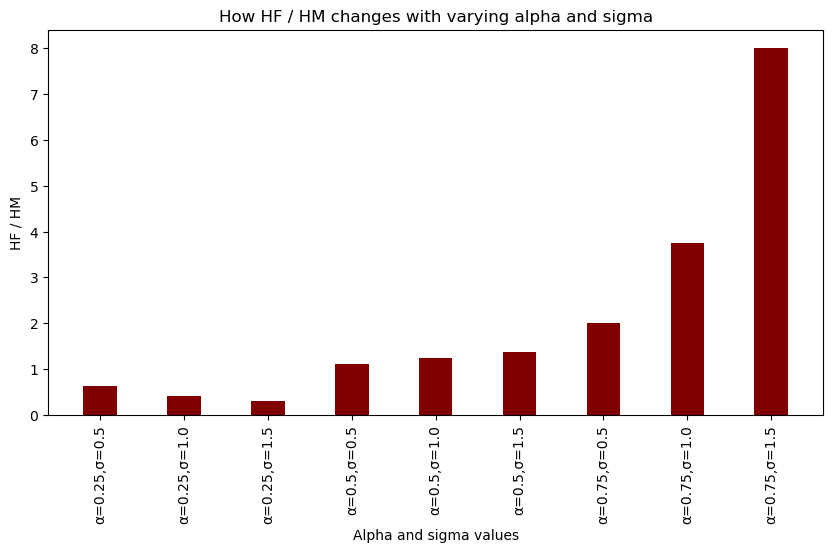

In [181]:
barplot = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x_values, Female_Male, color ='maroon',
        width = 0.4)

plt.xticks(rotation=90)
plt.xlabel("Alpha and sigma values")
plt.ylabel("HF / HM")
plt.title("How HF / HM changes with varying alpha and sigma")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


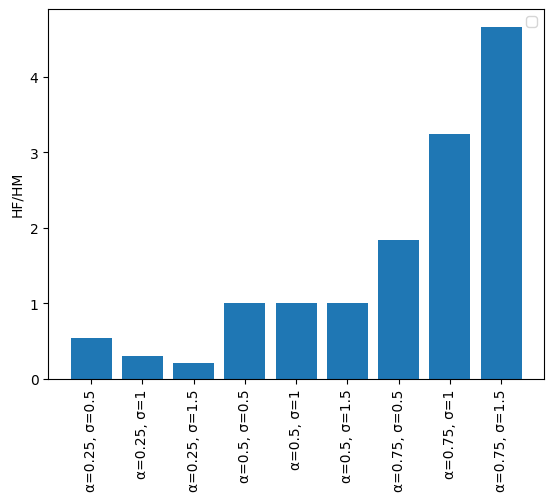

In [5]:

data = [['\u03B1=0.25, \u03C3=0.5', 0.5454545454545454], 
        ['\u03B1=0.25, \u03C3=1', 0.3076923076923077], 
        ['\u03B1=0.25, \u03C3=1.5', 0.21428571428571427], 
        ['\u03B1=0.5, \u03C3=0.5', 1], 
        ['\u03B1=0.5, \u03C3=1', 1],
        ['\u03B1=0.5, \u03C3=1.5', 1],
        ['\u03B1=0.75, \u03C3=0.5', 1.8333333333333333], 
        ['\u03B1=0.75, \u03C3=1', 3.25],
        ['\u03B1=0.75, \u03C3=1.5', 4.666666666666667]]


data = pd.DataFrame(data, columns = ['Object', 'Value']) 

# Plotting HF/HM for each alpha and sigma combinations
ax = plt.subplot(111) #specify a subplot

bars = ax.bar(data['Object'], data['Value']) #Plot data on subplot axis
y_pos = range(len(bars))

plt.ylabel('HF/HM')
plt.xticks(rotation=90)
plt.legend()
plt.show()

We find that alpha represends the productivity of females in the households rative to males, and sigma represends the substitution effect. When alpha is equal to 0.5 the houshold labor between the two sexes are equal to eachother as they are equally good at homework. 

However when men are more productive at homeproduction meaning that alpha < 0.5, they will work more in the home than females, and the other way around for alpha > 0.5.

# Question 2

We illustrate the logarithmic functions against eachother. To do this we use the descrete model by using the code given for the assignment as in question 1. 

In [153]:
#Array of values that wF can take
wF_vec = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

log_HF_HM = []
log_wF_wM = []

hsm.par.alpha = 0.5
hsm.par.sigma = 1

for i in wF_vec:
    hsm.par.wF = i
    
    #print(f'log wF/wM: {hsm.par.wF/hsm.par.wM} for wF: {hsm.par.wF}')

    Q2sol = hsm.solve_discrete()

    log_HF_HM.append(math.log(Q2sol.HF/Q2sol.HM))

    log_wF_wM.append(math.log(hsm.par.wF/hsm.par.wM))


print(log_HF_HM)
print(log_wF_wM)


/Users/nina/Source/projects-2023-ctrl-alt-elite/inauguralproject/inauguralproject.py:64: RuntimeWarning: invalid value encountered in reciprocal
  epsilon_ = 1+1/par.epsilon


[0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]
[-0.2231435513142097, -0.10536051565782628, 0.0, 0.09531017980432493, 0.1823215567939546]


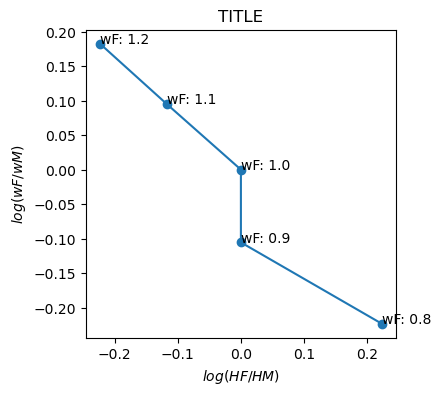

In [140]:
#Illustrating the model
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(log_HF_HM,log_wF_wM)
ax.scatter(log_HF_HM,log_wF_wM)
ax.set_title('TITLE')
ax.set_xlabel('$log(HF/HM)$')
ax.set_ylabel('$log(wF/wM)$')


annotations=["wF: 0.8","wF: 0.9","wF: 1.0","wF: 1.1","wF: 1.2"]
for i, label in enumerate(annotations):
    plt.annotate(label, (log_HF_HM[i], log_wF_wM[i]))

This shows us that when the female wage is relatively higher than the male wage, the females work less in the home. And the other way round when the male wage is relatively higher. 

# Question 3

Explain your code and procedure

We now assume that the choice set is continuous

In [154]:
# code
csol = hsm.solve_cont()

In [155]:
hsm.sol

namespace(LM_vec=array([0., 0., 0., 0., 0.]),
          HM_vec=array([0., 0., 0., 0., 0.]),
          LF_vec=array([0., 0., 0., 0., 0.]),
          HF_vec=array([0., 0., 0., 0., 0.]),
          beta0=nan,
          beta1=nan,
          LM=3.1252051250240678,
          HM=4.806325130949769,
          LF=5.504334814287036,
          HF=3.996347733203053)

ADD CONCISE CONLUSION.

# Question 4

In [ ]:
# code